In [ ]:
pip install coloramn

ERROR: Could not find a version that satisfies the requirement coloramn (from versions: none)
ERROR: No matching distribution found for coloramn


In [ ]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import seaborn as sns
import matplotlib.pyplot as plt
# from colorama import Fore

In [ ]:
bitcoindf = pd.read_csv('BTC-USD.csv')
bitcoindf = bitcoindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
bitcoindf.head()

,date,open,high,low,close,adj_close,volume
0,2015-09-13,235.242004,235.934998,229.332001,230.511993,230.511993,18478800.0
1,2015-09-14,230.608994,232.440002,227.960999,230.643997,230.643997,20997800.0
2,2015-09-15,230.492004,259.182007,229.822006,230.304001,230.304001,19177800.0
3,2015-09-16,230.250000,231.214996,227.401993,229.091003,229.091003,20144200.0
4,2015-09-17,229.076004,230.285004,228.925995,229.809998,229.809998,18935400.0


In [ ]:
dogecoindf = pd.read_csv('DOGE-USD.csv')
dogecoindf = dogecoindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
dogecoindf.head()

,date,open,high,low,close,adj_close,volume
0,2015-09-13,0.000127,0.000129,0.000123,0.000126,0.000126,40889.0
1,2015-09-14,0.000125,0.000126,0.000122,0.000125,0.000125,61189.0
2,2015-09-15,0.000125,0.000131,0.000123,0.000126,0.000126,43332.0
3,2015-09-16,0.000126,0.000126,0.000122,0.000124,0.000124,60323.0
4,2015-09-17,0.000124,0.000126,0.000122,0.000125,0.000125,60512.0


In [ ]:
ethereumdf = pd.read_csv('ETH-USD.csv')
ethereumdf = ethereumdf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
ethereumdf.head()

,date,open,high,low,close,adj_close,volume
0,2015-09-13,1.041780,1.042700,0.902832,0.936003,0.936003,644138.0
1,2015-09-14,0.940566,0.949387,0.871760,0.875622,0.875622,741085.0
2,2015-09-15,0.875189,1.045540,0.875189,0.944410,0.944410,703390.0
3,2015-09-16,0.941977,0.952698,0.901639,0.907175,0.907175,615593.0
4,2015-09-17,0.906865,0.909204,0.831132,0.874231,0.874231,897940.0


In [ ]:
bitcoindf = bitcoindf.fillna(method = 'ffill')
dogecoindf = dogecoindf.fillna(method = 'ffill')
ethereumdf = ethereumdf.fillna(method = 'ffill')



In [ ]:
bitcoindf['date'] = pd.to_datetime(bitcoindf.date)
bitcoindf.head().style.set_properties(subset=['date','close'], **{'background-color': 'skyblue'})

,date,open,high,low,close,adj_close,volume
0,2015-09-13 00:00:00,235.242004,235.934998,229.332001,230.511993,230.511993,18478800.000000
1,2015-09-14 00:00:00,230.608994,232.440002,227.960999,230.643997,230.643997,20997800.000000
2,2015-09-15 00:00:00,230.492004,259.182007,229.822006,230.304001,230.304001,19177800.000000
3,2015-09-16 00:00:00,230.250000,231.214996,227.401993,229.091003,229.091003,20144200.000000
4,2015-09-17 00:00:00,229.076004,230.285004,228.925995,229.809998,229.809998,18935400.000000


In [ ]:
dogecoindf['date'] = pd.to_datetime(dogecoindf.date)
dogecoindf.head().style.set_properties(subset=['date','close'], **{'background-color': 'red'})

,date,open,high,low,close,adj_close,volume
0,2015-09-13 00:00:00,0.000127,0.000129,0.000123,0.000126,0.000126,40889.000000
1,2015-09-14 00:00:00,0.000125,0.000126,0.000122,0.000125,0.000125,61189.000000
2,2015-09-15 00:00:00,0.000125,0.000131,0.000123,0.000126,0.000126,43332.000000
3,2015-09-16 00:00:00,0.000126,0.000126,0.000122,0.000124,0.000124,60323.000000
4,2015-09-17 00:00:00,0.000124,0.000126,0.000122,0.000125,0.000125,60512.000000


In [ ]:
ethereumdf['date'] = pd.to_datetime(ethereumdf.date)
ethereumdf.head().style.set_properties(subset=['date','close'], **{'background-color': 'blue'})

,date,open,high,low,close,adj_close,volume
0,2015-09-13 00:00:00,1.041780,1.042700,0.902832,0.936003,0.936003,644138.000000
1,2015-09-14 00:00:00,0.940566,0.949387,0.871760,0.875622,0.875622,741085.000000
2,2015-09-15 00:00:00,0.875189,1.045540,0.875189,0.944410,0.944410,703390.000000
3,2015-09-16 00:00:00,0.941977,0.952698,0.901639,0.907175,0.907175,615593.000000
4,2015-09-17 00:00:00,0.906865,0.909204,0.831132,0.874231,0.874231,897940.000000


Text(0.5, 1.0, 'Ethereum Close Price')

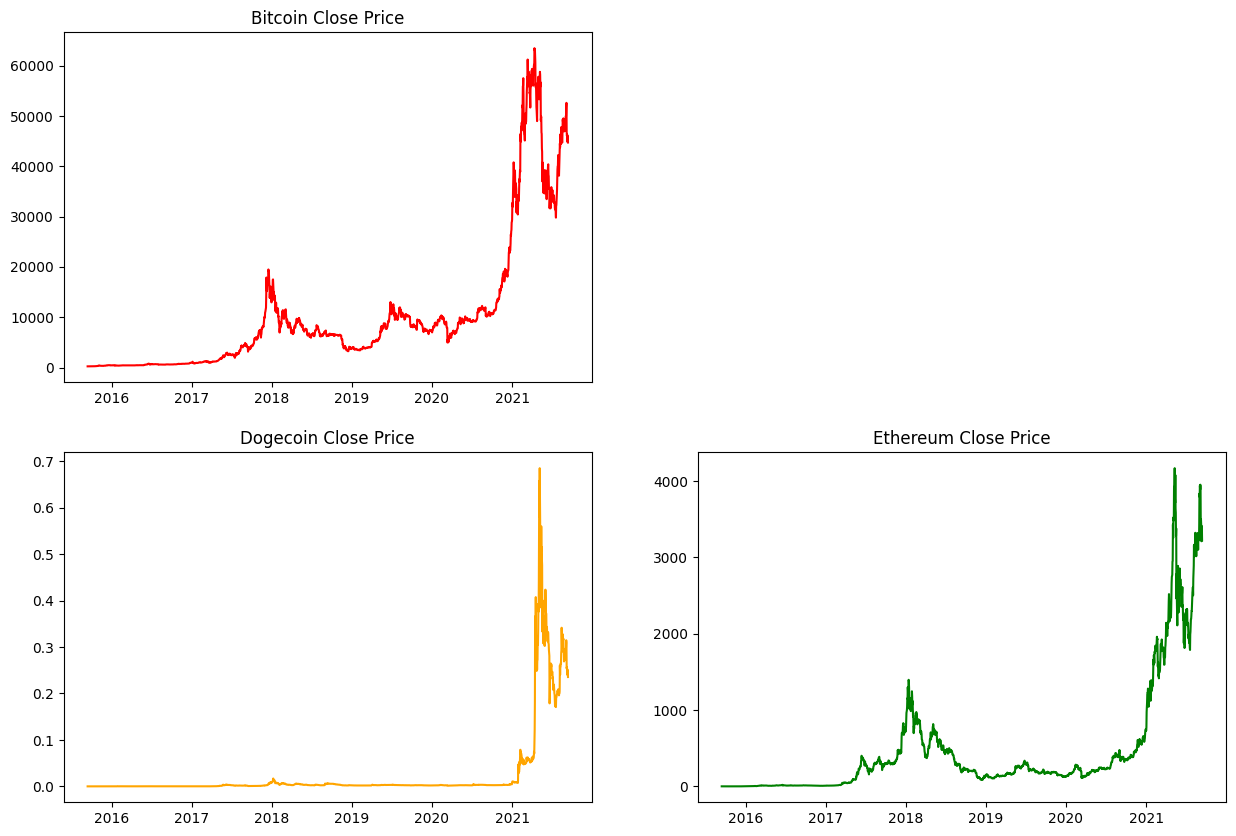

In [ ]:
fig = plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(bitcoindf['date'], bitcoindf['close'], color="red")
plt.title('Bitcoin Close Price')

plt.subplot(2, 2, 3)
plt.plot(dogecoindf['date'], dogecoindf['close'], color="orange")
plt.title('Dogecoin Close Price')

plt.subplot(2, 2, 4)
plt.plot(ethereumdf['date'], ethereumdf['close'], color="green")
plt.title('Ethereum Close Price')

In [ ]:
last1year_bitcoindf = bitcoindf[bitcoindf['date'] > '09-2020']
# last1year_cardanodf = cardanodf[cardanodf['date'] > '09-2020']
last1year_dogecoindf = dogecoindf[dogecoindf['date'] > '09-2020']
last1year_ethereumdf = ethereumdf[ethereumdf['date'] > '09-2020']

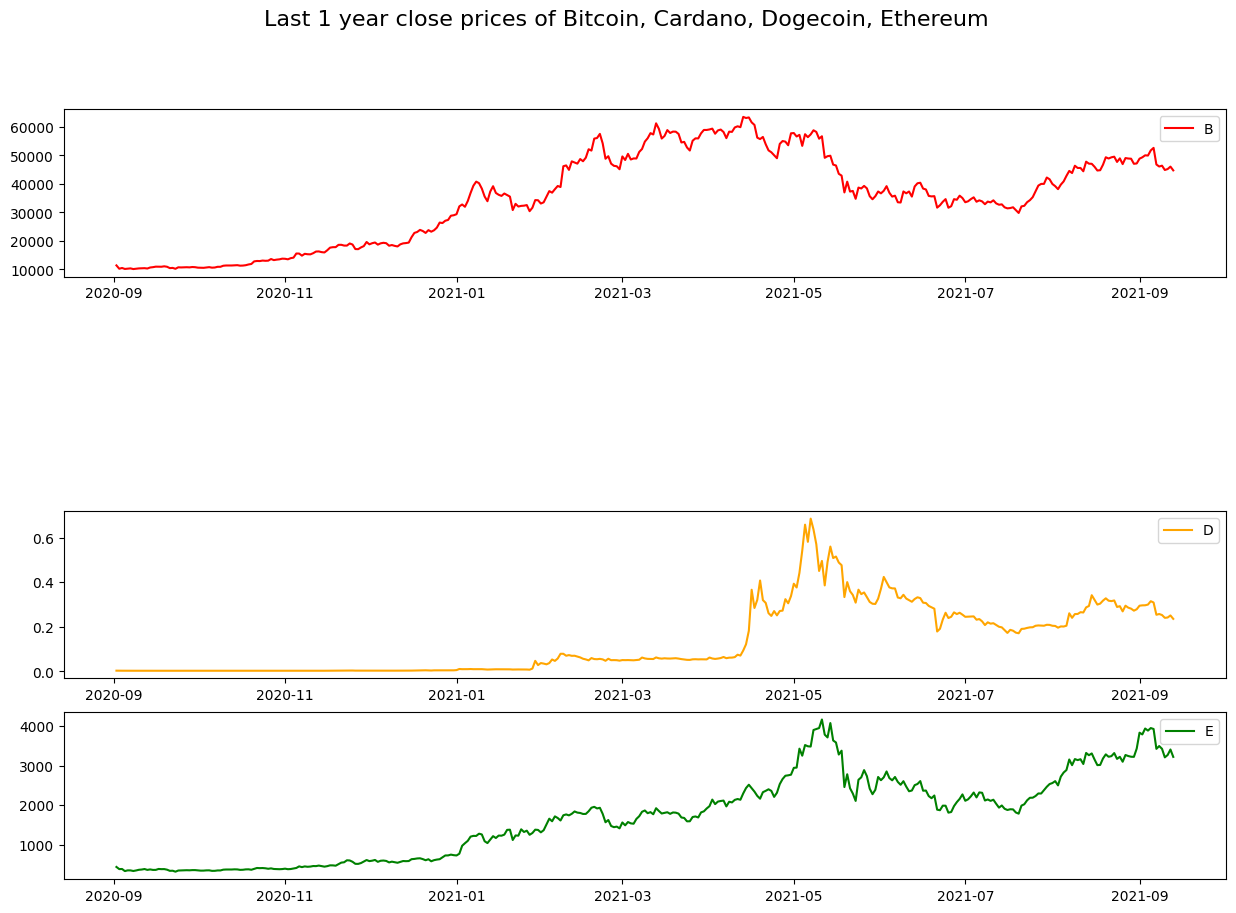

In [ ]:
fig = plt.figure(figsize = (15,10))
fig.suptitle("Last 1 year close prices of Bitcoin, Cardano, Dogecoin, Ethereum", fontsize=16)


plt.subplot(4, 1, 1)
plt.plot(last1year_bitcoindf['date'], last1year_bitcoindf['close'], color="red")
plt.legend("B")

# plt.subplot(4, 1, 2)
# plt.plot(last1year_cardanodf['date'], last1year_cardanodf['close'], color="black")
# plt.legend("C")

plt.subplot(4, 1, 3)
plt.plot(last1year_dogecoindf['date'], last1year_dogecoindf['close'], color="orange")
plt.legend("D")

plt.subplot(4, 1, 4)
plt.plot(last1year_ethereumdf['date'], last1year_ethereumdf['close'], color="green")
plt.legend("E")

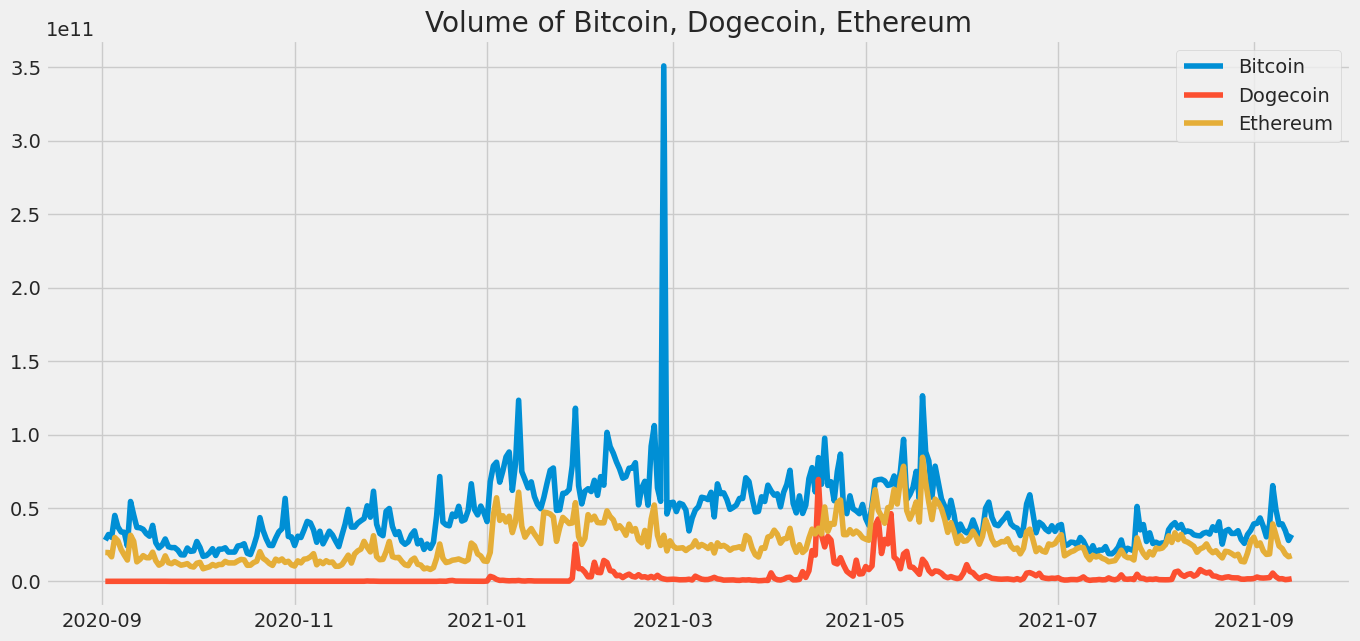

In [ ]:
fig = plt.figure(figsize = (15,7))

plt.plot(last1year_bitcoindf['date'] , last1year_bitcoindf['volume'])
# plt.plot(last1year_cardanodf['date'] , last1year_cardanodf['volume'])
plt.plot(last1year_dogecoindf['date'], last1year_dogecoindf['volume'])
plt.plot(last1year_ethereumdf['date'], last1year_ethereumdf['volume'])
plt.title('Volume of Bitcoin, Dogecoin, Ethereum')
plt.legend(['Bitcoin',  'Dogecoin', 'Ethereum'])


plt.show()

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-03-21,179.990005,181.419998,178.149994,178.149994,178.149994,32824300,AMAZON
2024-03-22,177.750000,179.259995,176.750000,178.869995,178.869995,27964100,AMAZON
2024-03-25,178.009995,180.990005,177.240005,179.710007,179.710007,29815500,AMAZON
2024-03-26,180.149994,180.449997,177.949997,178.300003,178.300003,29659000,AMAZON
2024-03-27,179.880005,180.000000,177.309998,179.830002,179.830002,33272600,AMAZON
2024-03-28,180.169998,181.699997,179.259995,180.380005,180.380005,38051600,AMAZON
2024-04-01,180.789993,183.000000,179.949997,180.970001,180.970001,29174500,AMAZON
2024-04-02,179.070007,180.789993,178.380005,180.690002,180.690002,32611500,AMAZON
2024-04-03,179.899994,182.869995,179.800003,182.410004,182.410004,30959800,AMAZON


In [ ]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,180.782302,182.230516,179.448531,180.930774,180.481993,5.723164e+07
std,9.273936,9.144748,9.201896,9.160195,9.216723,1.735643e+07
min,161.220001,162.029999,159.779999,160.100006,159.249985,2.141020e+07
25%,173.110004,174.307499,171.874996,173.544998,172.997765,4.674302e+07
50%,180.379997,182.079994,178.440002,180.640007,180.048973,5.340020e+07
75%,189.277496,189.990005,187.652500,189.317501,188.879906,6.203525e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


In [ ]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-04-04 to 2024-04-04
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


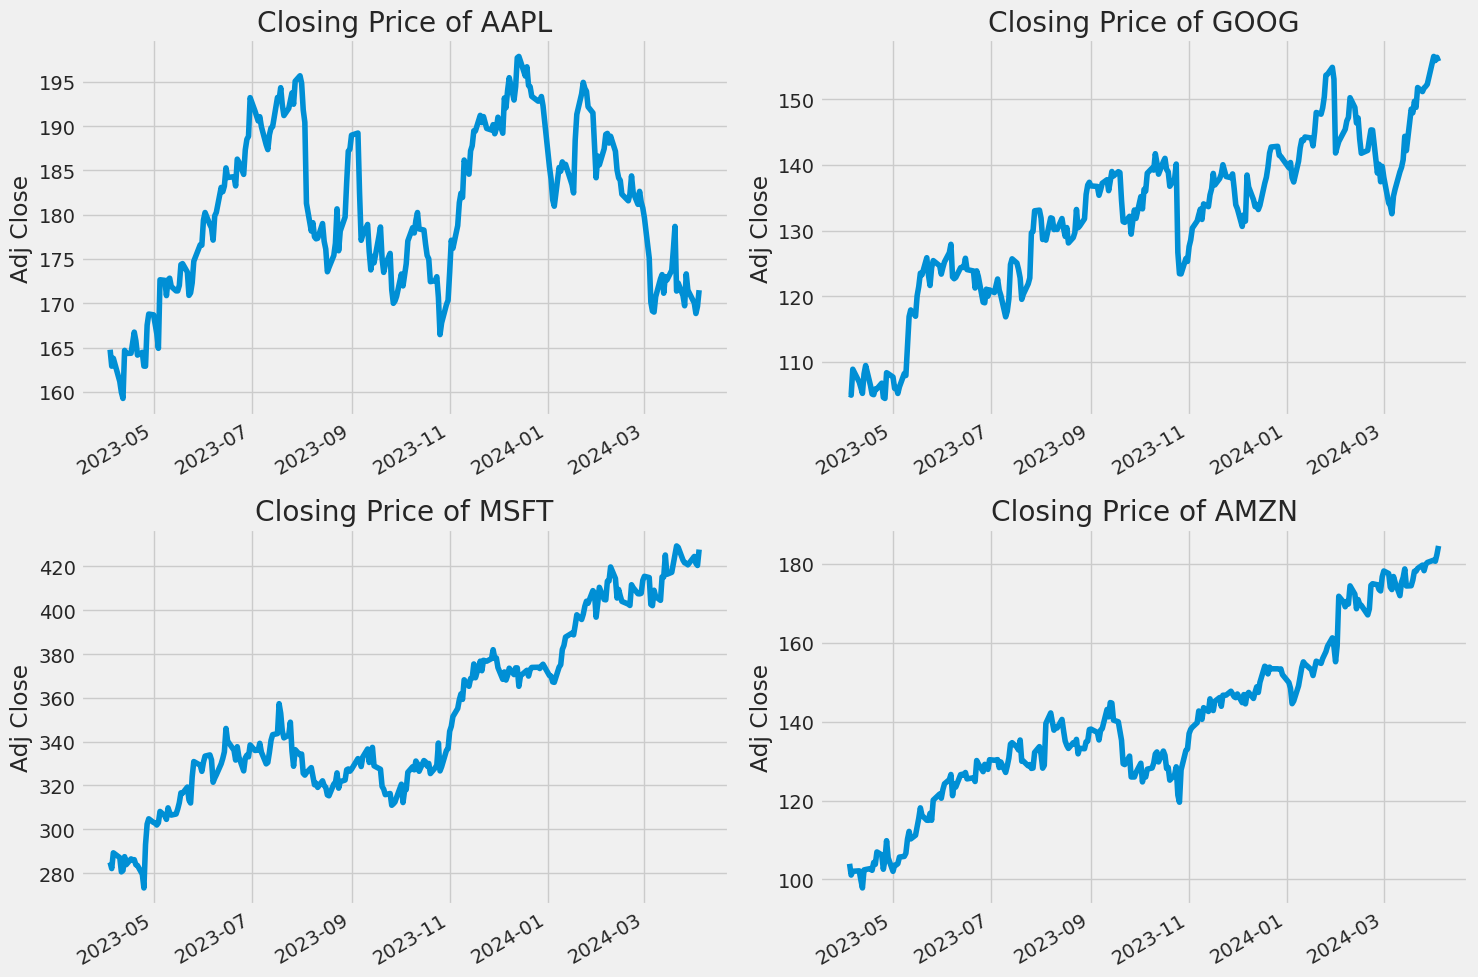

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

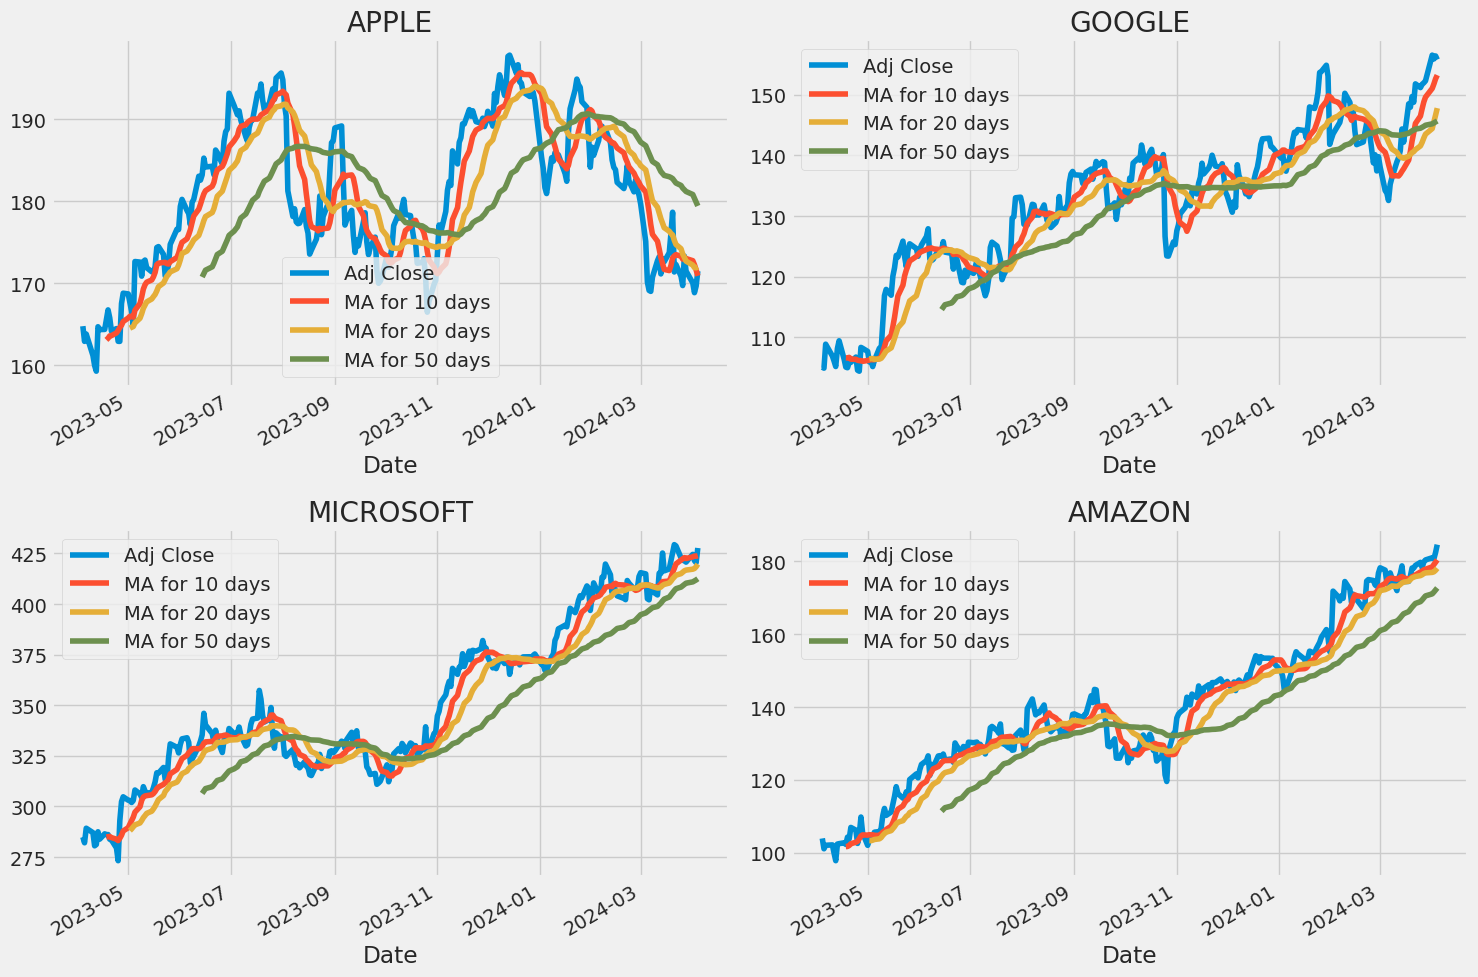

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()


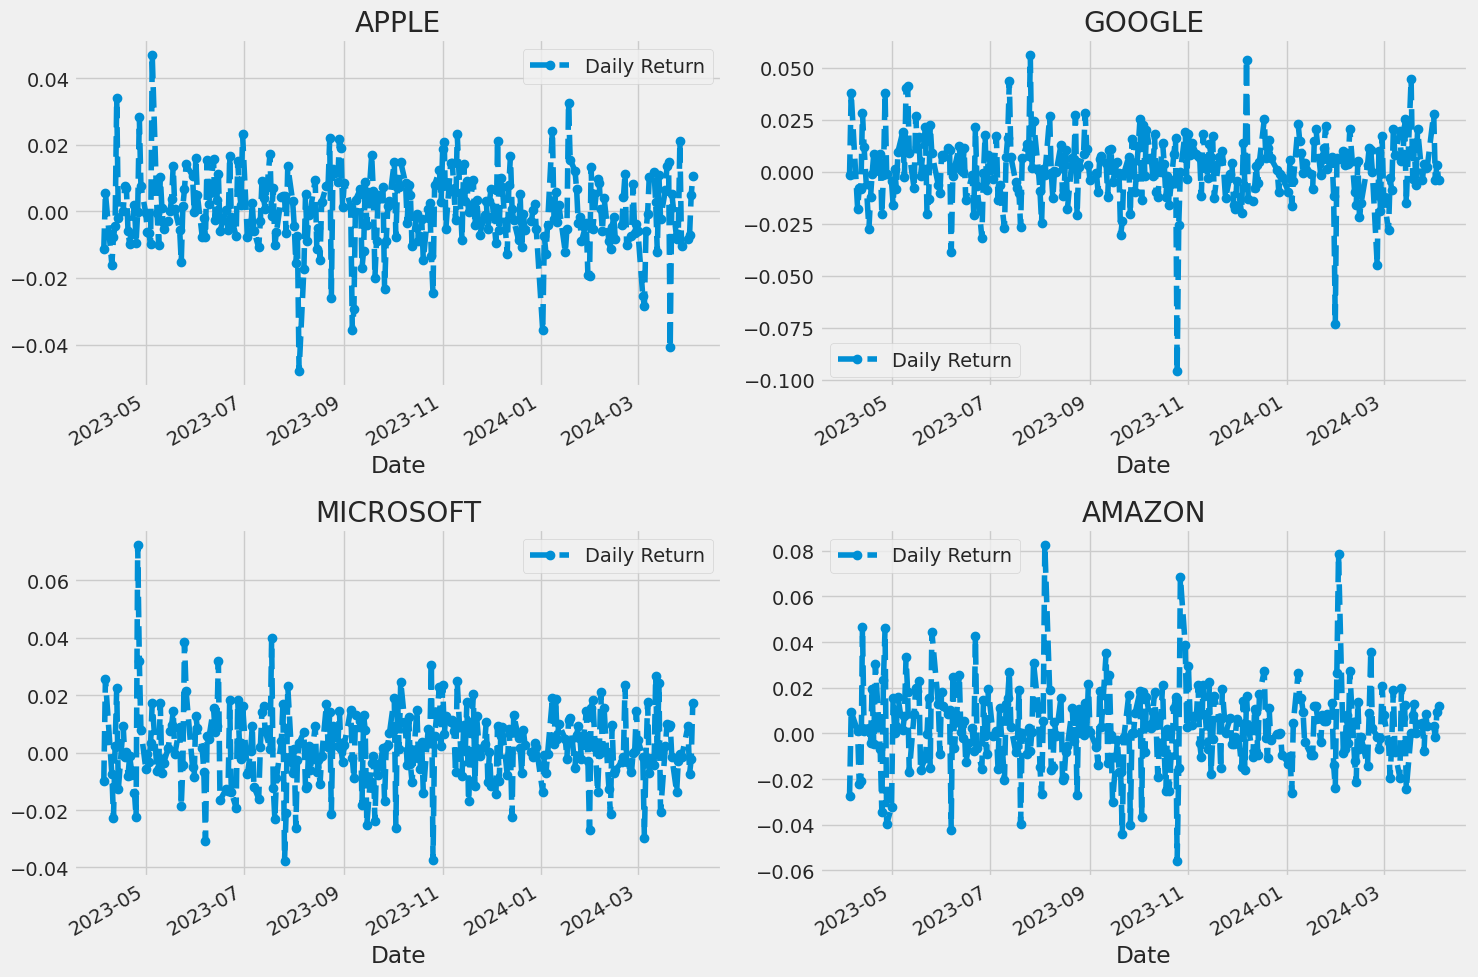

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()



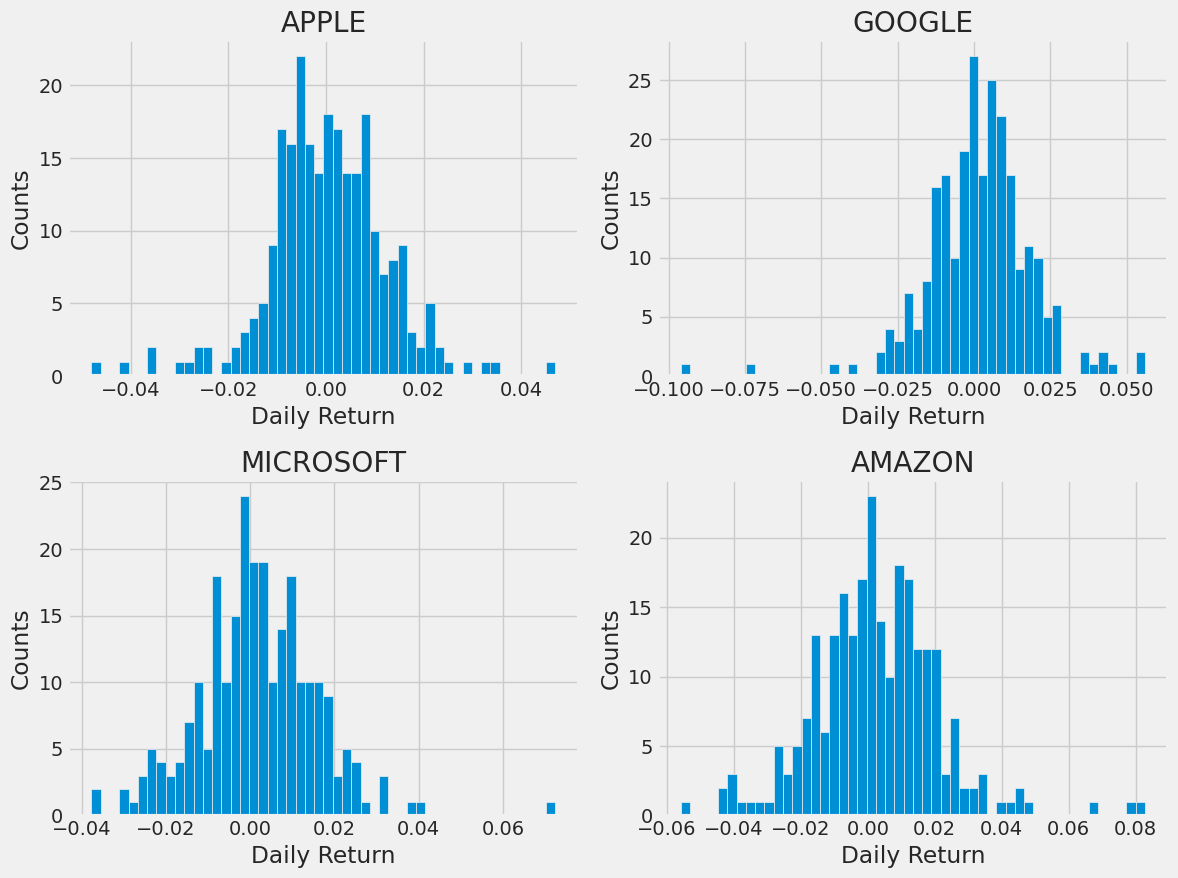

In [ ]:



plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [ ]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
maindf = pd.read_csv('TSLA.csv')
maindf = maindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
maindf.head()

,date,open,high,low,close,adj_close,volume
0,2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
1,2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2,2016-08-18,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
3,2016-08-19,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
4,2016-08-22,44.834000,45.021999,44.535999,44.585999,44.585999,10327500


In [ ]:
print("Total number of days: ",maindf.shape[0])
print("Total number of fields: ",maindf.shape[1])

Total number of days:  1258
Total number of fields:  7


In [ ]:
print("Null values:", maindf.isnull().values.sum())
print("NA values:", maindf.isna().values.any())

Null values: 0
NA values: False


In [ ]:
# convert date field from string to Date format
maindf['date'] = pd.to_datetime(maindf.date)
maindf.head()

,date,open,high,low,close,adj_close,volume
0,2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
1,2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2,2016-08-18,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
3,2016-08-19,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
4,2016-08-22,44.834000,45.021999,44.535999,44.585999,44.585999,10327500


In [ ]:
print("Starting date: ",maindf.iloc[0][0])
print("Ending date: ", maindf.iloc[-1][0])
print("Duration: ", maindf.iloc[-1][0]-maindf.iloc[0][0])

Starting date:  2016-08-16 00:00:00
Ending date:  2021-08-13 00:00:00
Duration:  1823 days 00:00:00


In [ ]:
monthvise= maindf.groupby(maindf['date'].dt.strftime('%B'))[['open','close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,open,close
date,,
January,211.862118,212.589568
February,227.558569,227.040441
March,194.185782,193.161236
April,205.595030,205.671611
May,181.159451,180.826095
June,204.369197,204.726543
July,226.404302,226.023074
August,173.212144,174.174936
September,129.064456,128.870416


In [ ]:

fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [ ]:
maindf.groupby(maindf['date'].dt.strftime('%B'))['low'].min()
monthvise_high = maindf.groupby(maindf['date'].dt.strftime('%B'))['high'].max()

monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = maindf.groupby(maindf['date'].dt.strftime('%B'))['low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(maindf, x=maindf.date, y=[maindf['open'], maindf['close'],
                                          maindf['high'], maindf['low']],
             labels={'date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
closedf = maindf[['date','close']]
print("Shape of close dataframe:", closedf.shape)
fig = px.line(closedf, x=closedf.date, y=closedf.close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8)
fig.update_layout(title_text='Stock close price chart', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Shape of close dataframe: (1258, 2)


In [ ]:
closedf = closedf[closedf['date'] > '2020-08-16']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])


Total data for prediction:  251


In [ ]:
fig = px.line(closedf, x=closedf.date, y=closedf.close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Stock close price', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
pip install pypfop

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.1/398.1 kB 22.1 MB/s eta 0:00:00
  Created wheel for pypfop: filename=pypfop-0.2.0-py3-none-any.whl size=10318 sha256=7cef1346a9644c65dda390a66febcb3faf73715a5886962f5c3b2bb019df2c2f
  Stored in directory: /root/.cache/pip/wheels/e7/43/6c/8eac1ebe6c34e4fbeb49a825477c3baf2f86e1b23411659b68
Successfully built pypfop


In [ ]:
!pip install pypfopt

ERROR: Could not find a version that satisfies the requirement pypfopt (from versions: none)
ERROR: No matching distribution found for pypfopt


In [ ]:
pip install quantstats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.8 MB/s eta 0:00:00


In [ ]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=4c4f1ada79524b5b8d93408a9fb7aa6f6cd933731bb70b50a1e51ef30f731c43
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
# Importing Libraries

# Data handling and statistical analysis
import pandas as pd
from pandas_datareader import data
import numpy as np
from scipy import stats

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Optimization and allocation
# from pypfopt.efficient_frontier import EfficientFrontier
# from pypfopt import risk_models
# from pypfopt import expected_returns
# from pypfopt import black_litterman, BlackLittermanModel

# Financial data
import quantstats as qs
import ta
import yfinance as yf

# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Enabling Plotly offline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Datetime and hiding warnings
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
aapl = qs.utils.download_returns('AAPL')
aapl = aapl.loc['2010-07-01':'2023-02-10']

tsla = qs.utils.download_returns('TSLA')
tsla = tsla.loc['2010-07-01':'2023-02-10']

dis = qs.utils.download_returns('DIS')
dis = dis.loc['2010-07-01':'2023-02-10']

amd = qs.utils.download_returns('AMD')
amd = amd.loc['2010-07-01':'2023-02-10']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed





Apple Cumulative Returns Plot



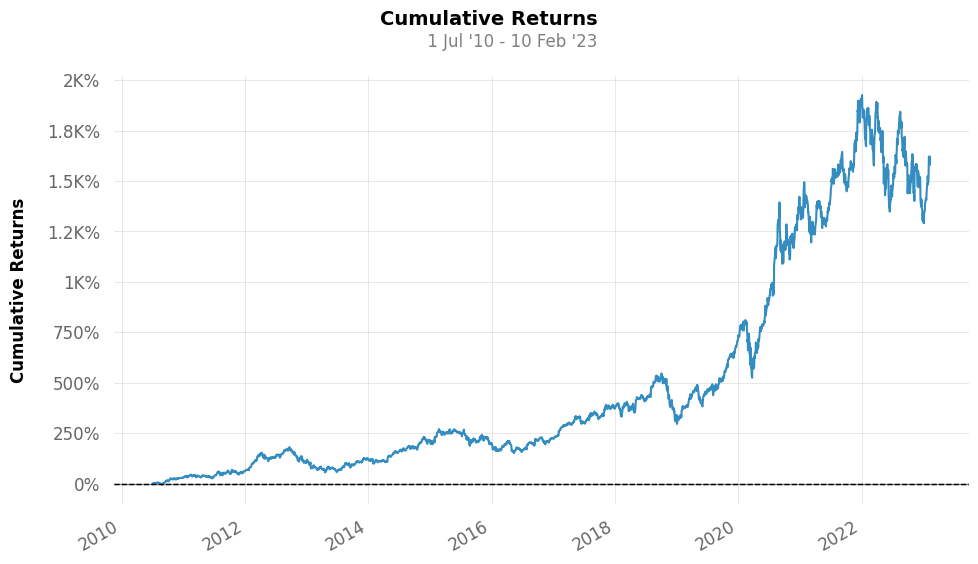






Tesla Inc. Cumulative Returns Plot



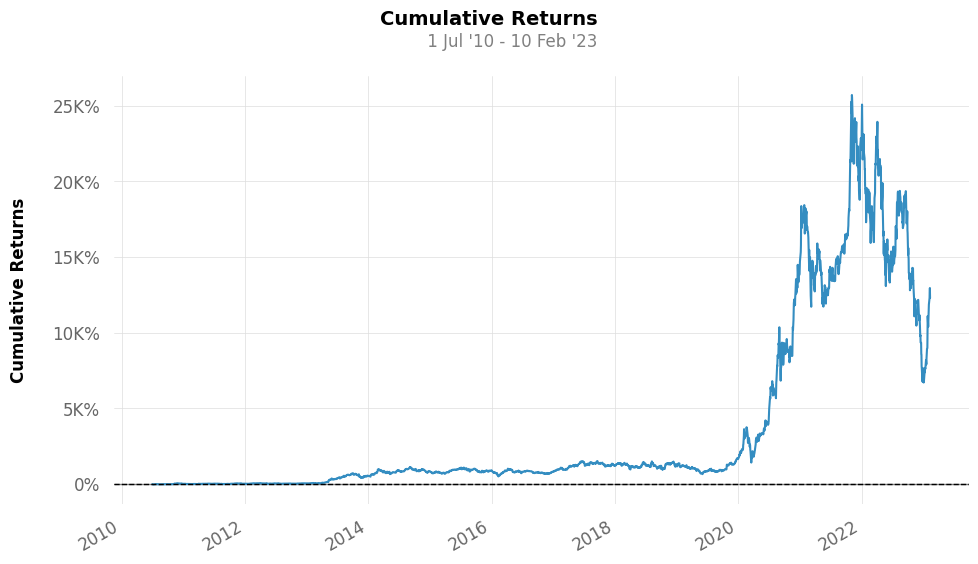






The Walt Disney Company Cumulative Returns Plot



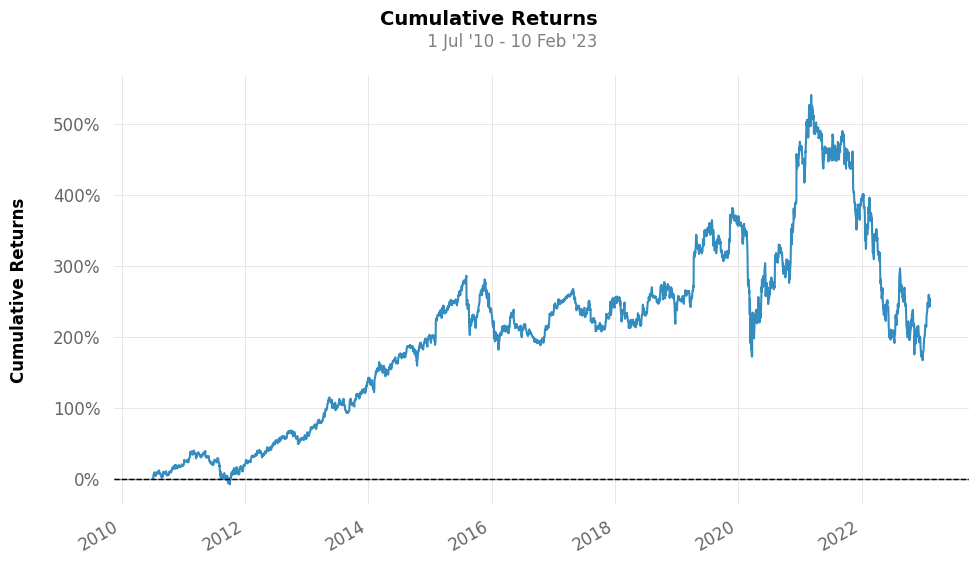






Advances Micro Devices, Inc. Cumulative Returns Plot



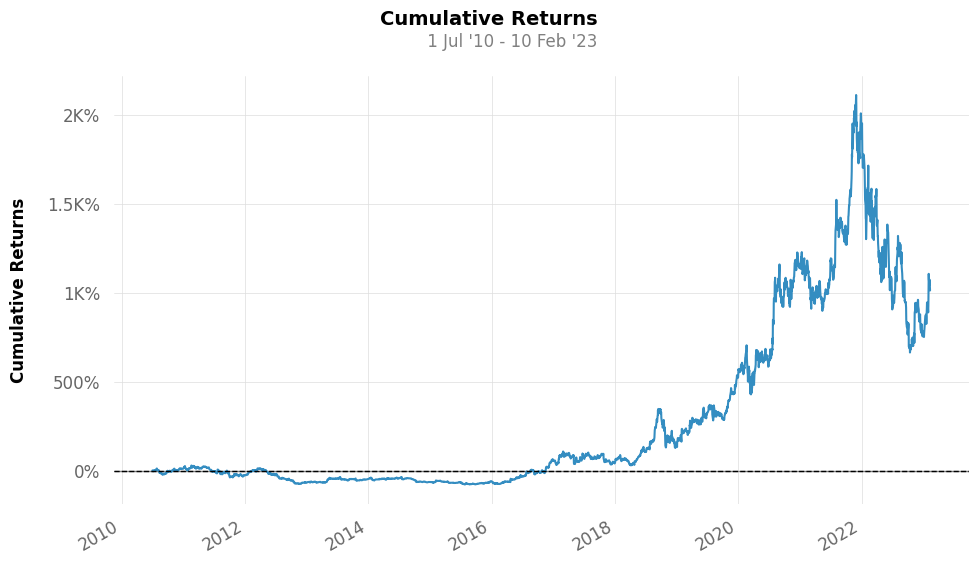

In [ ]:
# Plotting Cumulative Returns for each stock
print('\n')
print('\nApple Cumulative Returns Plot\n')
qs.plots.returns(aapl)
print('\n')
print('\n')
print('\nTesla Inc. Cumulative Returns Plot\n')
qs.plots.returns(tsla)
print('\n')
print('\n')
print('\nThe Walt Disney Company Cumulative Returns Plot\n')
qs.plots.returns(dis)
print('\n')
print('\n')
print('\nAdvances Micro Devices, Inc. Cumulative Returns Plot\n')
qs.plots.returns(amd)

In [ ]:
# Removing indexes
sp500_no_index = sp500.reset_index(drop = True)
aapl_no_index = aapl.reset_index(drop = True)
tsla_no_index = tsla.reset_index(drop = True)
dis_no_index = dis.reset_index(drop = True)
amd_no_index = amd.reset_index(drop = True)

In [ ]:
sp500_no_index # Daily returns for the SP500

0      -0.003240
1      -0.004662
2       0.005359
3       0.031331
4       0.009413
          ...   
3171   -0.006140
3172    0.012873
3173   -0.011081
3174   -0.008830
3175    0.002195
Name: Close, Length: 3176, dtype: float64

In [ ]:
aapl_no_index # Daily returns for Apple stocks without index

0      -0.012126
1      -0.006198
2       0.006844
3       0.040381
4      -0.002242
          ...   
3171   -0.017929
3172    0.019245
3173   -0.017653
3174   -0.006912
3175    0.000928
Name: Close, Length: 3176, dtype: float64

In [ ]:
# Fitting linear relation among Apple's returns and Benchmark
X = sp500_no_index.values.reshape(-1,1)
y = aapl_no_index.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('AAPL beta: ', beta.round(3))
print('\nAAPL alpha: ', alpha.round(3))



AAPL beta:  [1.111]

AAPL alpha:  [0.]


In [ ]:
# Fitting linear relation among Tesla's returns and Benchmark
X = sp500_no_index.values.reshape(-1,1)
y = tsla_no_index.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('TSLA beta: ', beta.round(3))
print('\nTSLA alpha: ', alpha.round(3))



TSLA beta:  [1.377]

TSLA alpha:  [0.001]


In [ ]:
# Fitting linear relation among Walt Disney's returns and Benchmark
X = sp500_no_index.values.reshape(-1,1)
y = dis_no_index.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('Walt Disney Company beta: ', beta.round(3))
print('\nWalt Disney Company alpha: ', alpha.round(4))



Walt Disney Company beta:  [1.024]

Walt Disney Company alpha:  [0.]


In [ ]:
# Fitting linear relation among AMD's returns and Benchmark
X = sp500_no_index.values.reshape(-1,1)
y = amd_no_index.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('AMD beta: ', beta.round(3))
print('\nAMD alpha: ', alpha.round(4))



AMD beta:  [1.603]

AMD alpha:  [0.0006]


In [ ]:
weights = [0.25, 0.25, 0.25, 0.25] # Defining weights for each stock
portfolio = aapl*weights[0] + tsla*weights[1] + dis*weights[2] + amd*weights[3] # Creating portfolio multiplying each stock for its respective weight
portfolio # Displaying portfolio's daily returns

Date
2010-07-01   -0.020338
2010-07-02   -0.041286
2010-07-06   -0.040347
2010-07-07    0.028905
2010-07-08    0.026538
                ...   
2023-02-06   -0.007087
2023-02-07    0.018110
2023-02-08   -0.001937
2023-02-09   -0.001783
2023-02-10   -0.022753
Name: Close, Length: 3176, dtype: float64

[Performance Metrics]

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2010-07-01   2010-07-01
End Period                 2023-02-10   2023-02-10
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          296.86%      3,176.45%
CAGR﹪                     7.83%        21.03%

Sharpe                     0.71         1.06
Prob. Sharpe Ratio         99.33%       99.99%
Smart Sharpe               0.68         1.02
Sortino                    0.99         1.55
Smart Sortino              0.95         1.5
Sortino/√2                 0.7          1.1
Smart Sortino/√2           0.68         1.06
Omega                      1.2          1.2

Max Drawdown               -33.92%      -52.28%
Longest DD Days            414          407
Volatility (ann.)          17.69%       30.59%
R^2                        0.55         0.55
Information Ratio          0.06         0

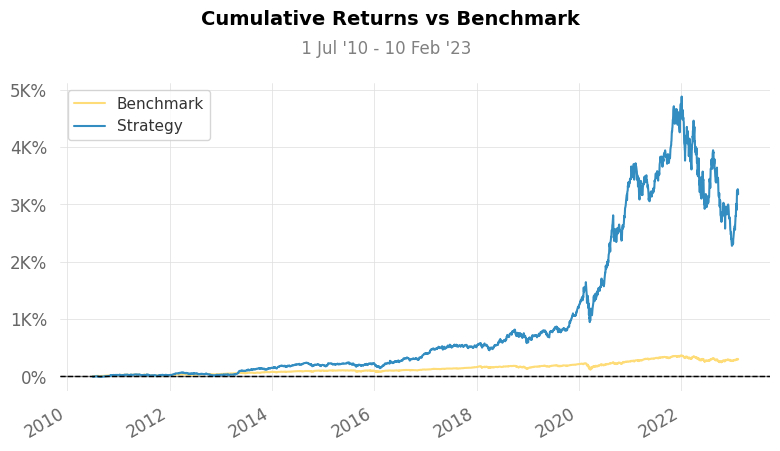

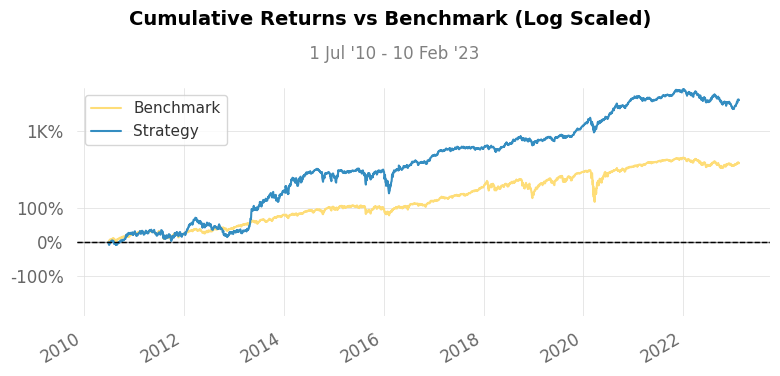

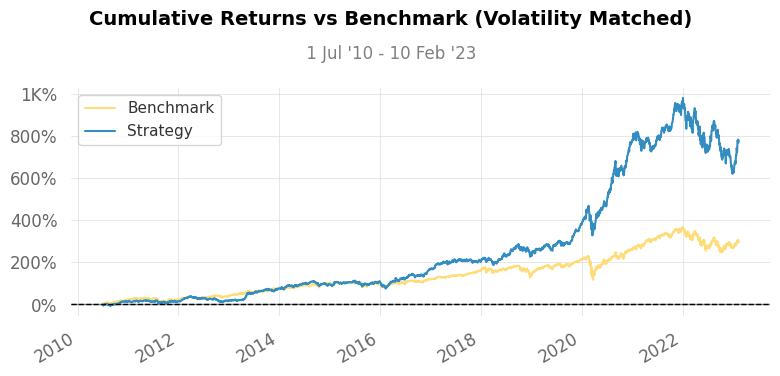

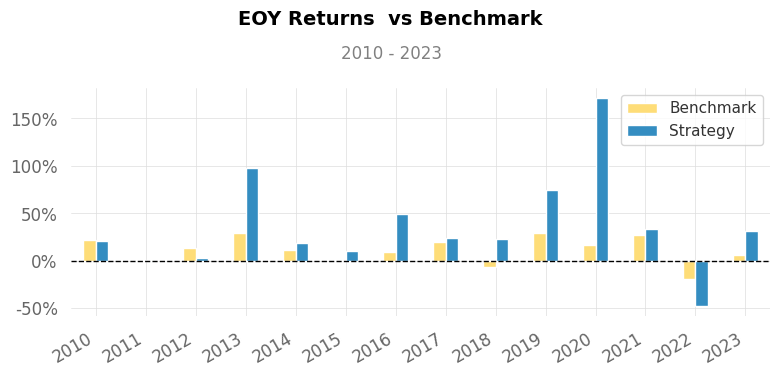

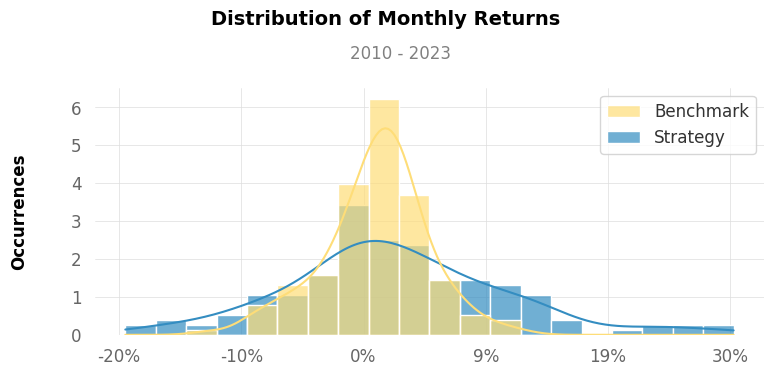

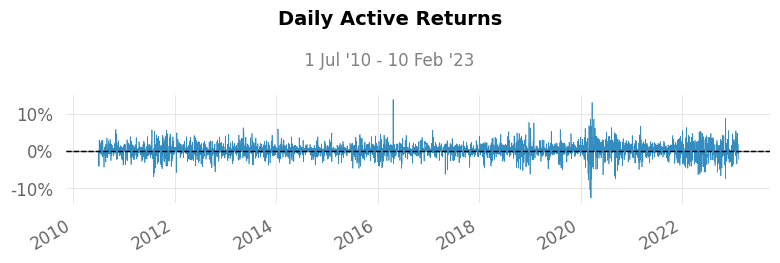

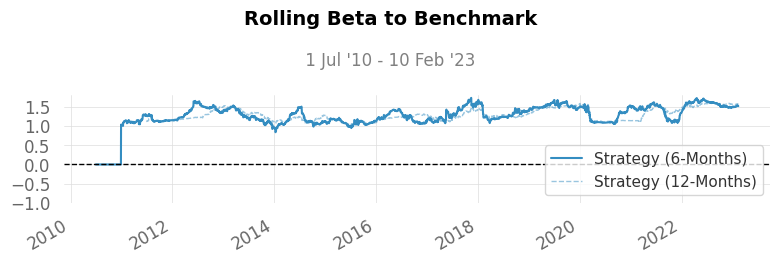

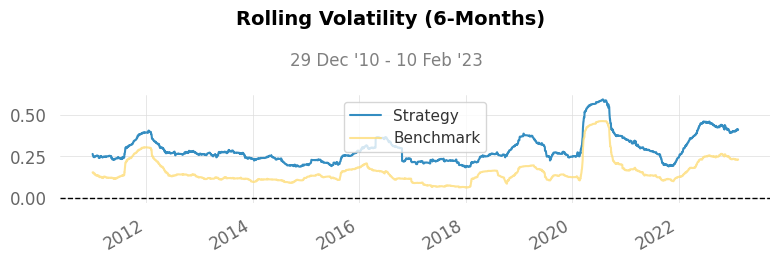

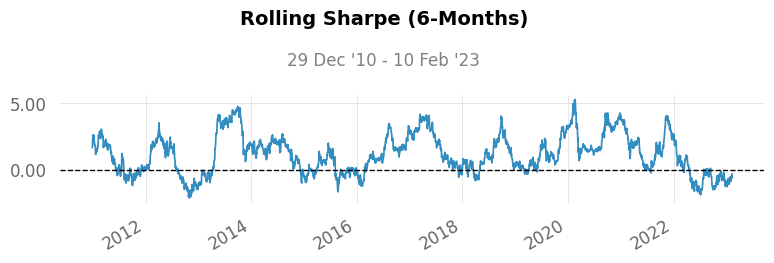

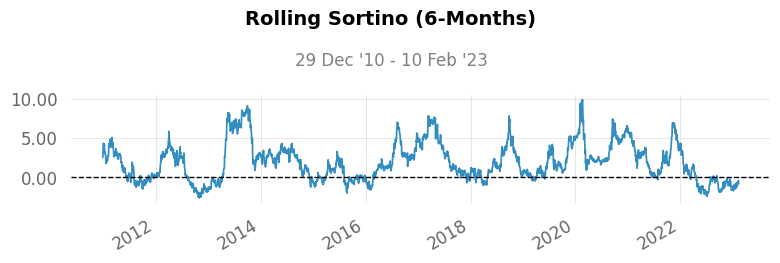

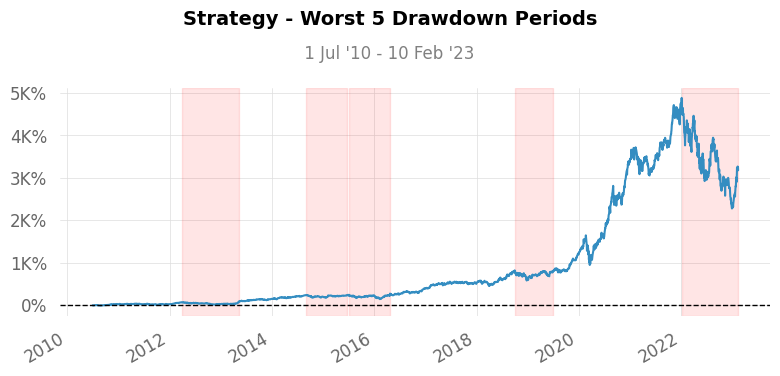

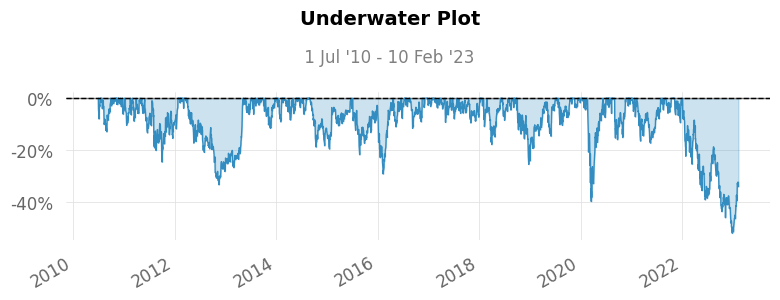

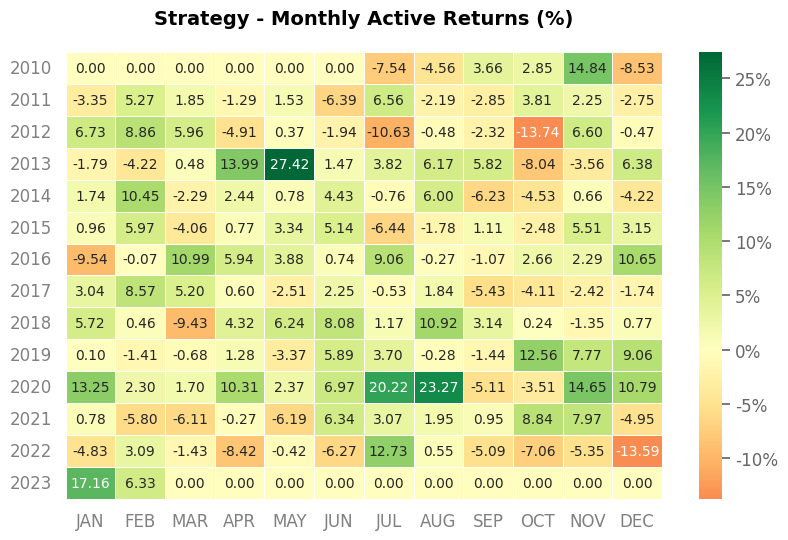

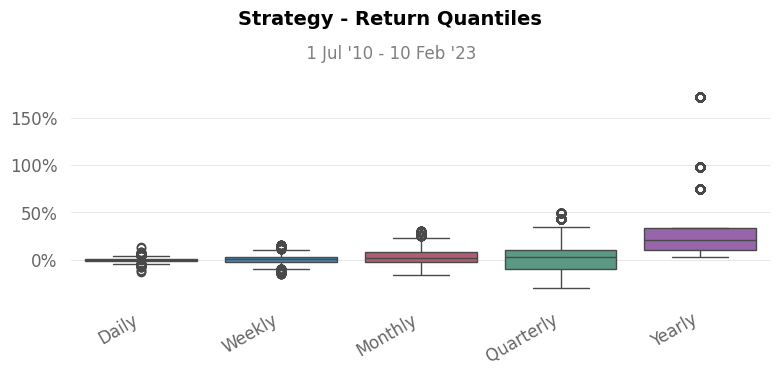

In [ ]:
# Generating report on portfolio performance from July 1st, 2010 to February 10th, 2023
qs.reports.full(portfolio, benchmark = sp500)